# Analyzing Historical Stock/Revenue Data for Tesla and GameStop and Building a Dashboard

## Contents 

1. Extracting Tesla Stock Data Using yfinance 
2. Extracting Tesla Revenue Data Using Webscraping 
3. Extracting GameStop Stock Data Using yfinance 
4. Extracting GameStop Revenue Data Using Webscraping 
5. Building Tesla Stock and Revenue Dashboard 
6. Building GameStop Stock and Revenue Dashboard  

### Part 1: Extracting Tesla Stock Data Using yfinance 

Importing the yfinance library, which allows downloading historical market data from Yahoo Finance, and the pandas library, which is used for data manipulation and analysis in Python:

In [171]:
import yfinance as yf
import pandas as pd

Using the `Ticker` module to create an object that will allow access to functions to extract data. To do this I will provide the ticker symbol for the stock, here the company is Tesla and the ticker symbol is `TSLA`.

In [172]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` to extract stock information and save it in a dataframe named `tesla_data`. Setting the period parameter to `max` to get information for the maximum amount of time.

In [173]:
tesla_data = tesla.history(period="max")

Reseting the index, adjusting the date column to only show yy-mm-dd, and displaying the first five rows of the `tesla_data` dataframe using the `head` function.

In [184]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Plotting Tesla `Open` price against `Date`

<Axes: title={'center': 'Tesla Stock Open Prices 2010-2024'}, xlabel='Date', ylabel='Open Price'>

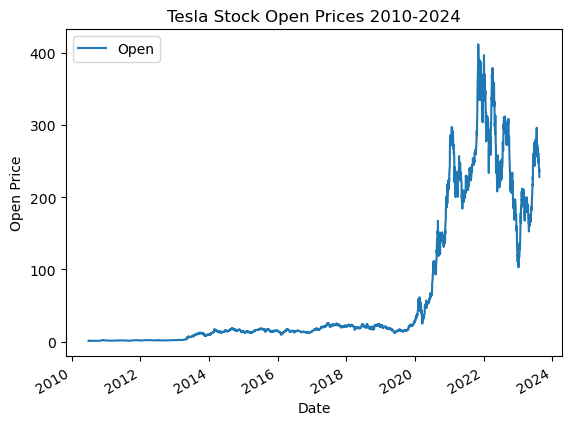

In [185]:
ax = tesla_data.plot(x="Date", y="Open")


ax.set_title("Tesla Stock Open Prices 2010-2024")
ax.set_xlabel("Date")
ax.set_ylabel("Open Price")


ax

### Part 2: Extracting Tesla Revenue Data Using Webscraping  

Importing PANDAS, requests, and BeautifulSoup libraries.

In [186]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Will extract tesla data from table in through webscraping using the following steps:
* Send an HTTP request to the webpage using the requests library
* Parse the HTML content of the webpage using BeautifulSoup
* Identify the HTML tags that contain the data for extraction
* Use BeautifulSoup methods to extract the data from the HTML tags
* Print the extracted data

Sending an HTTP request to the webpage using the requests library

In [187]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [188]:
html_data  = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parsing the HTML content using Beautiful soup library.

In [189]:
soup = BeautifulSoup(html_data, 'html5lib')
soup.find_all("tbody")

[<tbody>
 								
 												
 				<tr>
 					<td style="text-align:center">2021</td>
 				
 				
 				
 										<td style="text-align:center">$53,823</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2020</td>
 				
 				
 				
 										<td style="text-align:center">$31,536</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2019</td>
 				
 				
 				
 										<td style="text-align:center">$24,578</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2018</td>
 				
 				
 				
 										<td style="text-align:center">$21,461</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2017</td>
 				
 				
 				
 										<td style="text-align:center">$11,759</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2016</td>
 				
 				
 				
 							

Identifying HTML tags and creating an empty DataFrame using the <b> pd.DataFrame() </b> function with the following columns.
* "Date"
* "Revenue"


In [190]:
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

<hr>
<hr>
<center>

### Working on HTML table  </center>
<br>

These are the following tags which are used while creating HTML tables.

* &lt;table&gt; tag: This tag is root tag used to define the start and end of the table. All the content of the table is enclosed within these tags. 


* &lt;tr&gt; tag: This tag is used to define a table row. Each row of the table is defined within this tag.

* &lt;td&gt; tag: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing <td> tags.

* &lt;th&gt; tag: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a <th> tag is bold and centered.

* &lt;tbody&gt; tag: This is the main content of the table, which is defined using the <tbody> tag. It contains one or more rows of <tr> elements.

<hr>
<hr>


In [191]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find_all("tbody")[1].find_all("tr"):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    # Finally we append the data of each row to the table
    Tesla_revenue=Tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
Tesla_revenue.head()

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3481617139.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3481617139.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3481617139.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3481617139.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3481617139.py:8: FutureWarning:

The frame.append method is depreca

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Removing the comma and dollar sign from the revenue column 

In [192]:
Tesla_revenue["Revenue"] = Tesla_revenue['Revenue'].str.replace(',|\$',"")

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/1085548629.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



Removing a null or empty strings in the Revenue column

In [193]:
Tesla_revenue.dropna(inplace=True)

Tesla_revenue = Tesla_revenue[Tesla_revenue['Revenue'] != ""]

Displaying the last five rows of the Tesla_revenue dataframe using the `tail` function

In [194]:
Tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### Part 3: Extracting GameStop Stock Data Using yfinance 

Importing the yfinance library, which allows downloading historical market data from Yahoo Finance, and the pandas library, which is used for data manipulation and analysis in Python:

In [243]:
import yfinance as yf
import pandas as pd

Using the `Ticker` module to create an object that will allow access to functions to extract data. To do this I will provide the ticker symbol for the stock, here the company is GameStop and the ticker symbol is `GME`.

In [278]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` to extract stock information and save it in a dataframe named `GameStop_data`. Setting the period parameter to `max` to get information for the maximum amount of time.

In [279]:
gme_data = GameStop.history(period="max")

Displaying the first five rows of the `tesla_data` dataframe using the `head` function.

In [280]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693351,1.603297,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Reseting the index of the DataFrame with the `reset_index` function. Also setting the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [281]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693351,1.603297,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


"Date" column in the tesla_data DataFrame will be modified to only contain the date portion in the YYYY-MM-DD format, and the time and time zone offset will be removed.

In [282]:
gme_data['Date'] = gme_data['Date'].dt.date
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693351,1.603297,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Plotting GameStop `Open` price against `Date`

<Axes: title={'center': 'GameStop Stock Open Prices 2004-2024'}, xlabel='Date', ylabel='Open Price'>

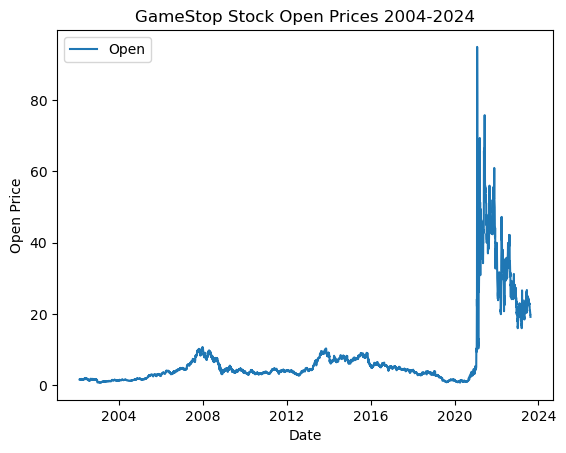

In [267]:
ay = gme_data.plot(x="Date", y="Open")


ay.set_title("GameStop Stock Open Prices 2004-2024")
ay.set_xlabel("Date")
ay.set_ylabel("Open Price")


ay

<Axes: xlabel='Date'>

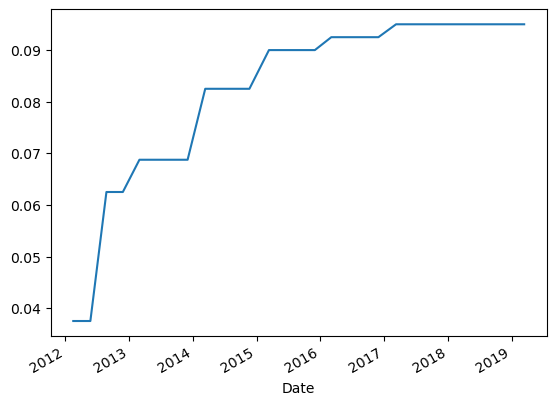

In [268]:
GameStop.dividends.plot()

### Part 4: Extracting GameStop Revenue Data Using Webscraping  

Importing PANDAS, requests, and BeautifulSoup libraries.

In [269]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Will extract GameStop data from table through webscraping using the following steps:
* Send an HTTP request to the webpage using the requests library
* Parse the HTML content of the webpage using BeautifulSoup
* Identify the HTML tags that contain the data for extraction
* Use BeautifulSoup methods to extract the data from the HTML tags
* Print the extracted data

Sending an HTTP request to the webpage using the requests library

In [283]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [284]:
html_data  = requests.get(url).text
print(html_data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

Parsing the HTML content using the BeautifulSoup library

In [285]:
soup = BeautifulSoup(html_data, 'html5lib')
soup.find_all("tbody")

[<tbody>
 								
 												
 				<tr>
 					<td style="text-align:center">2020</td>
 				
 				
 				
 										<td style="text-align:center">$6,466</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2019</td>
 				
 				
 				
 										<td style="text-align:center">$8,285</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2018</td>
 				
 				
 				
 										<td style="text-align:center">$8,547</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2017</td>
 				
 				
 				
 										<td style="text-align:center">$7,965</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2016</td>
 				
 				
 				
 										<td style="text-align:center">$9,364</td>
 				
 								
 				</tr>
 				  
 												
 				<tr>
 					<td style="text-align:center">2015</td>
 				
 				
 				
 										<t

Identifying HTML tags and creating an empty DataFrame using the <b> pd.DataFrame() </b> function with the following columns.
* "Date"
* "Revenue"

In [286]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

<hr>
<hr>
<center>

### Working on HTML table  </center>
<br>

These are the following tags which are used while creating HTML tables.

* &lt;table&gt; tag: This tag is root tag used to define the start and end of the table. All the content of the table is enclosed within these tags. 


* &lt;tr&gt; tag: This tag is used to define a table row. Each row of the table is defined within this tag.

* &lt;td&gt; tag: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing <td> tags.

* &lt;th&gt; tag: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a <th> tag is bold and centered.

* &lt;tbody&gt; tag: This is the main content of the table, which is defined using the <tbody> tag. It contains one or more rows of <tr> elements.

<hr>
<hr>



In [287]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find_all("tbody")[1].find_all("tr"):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    # Finally we append the data of each row to the table
    gme_revenue=gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
gme_revenue.head()

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3588435309.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3588435309.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3588435309.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3588435309.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/3588435309.py:8: FutureWarning:

The frame.append method is depreca

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


Removing the comma and dollar sign from the revenue column 

In [288]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_53252/401512746.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



Removing a null or empty strings in the revenue column 

In [289]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Part 5: Building Tesla Stock and Revenue Dashboard 

In [167]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [168]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [198]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


### Part 6: Building GameStop Stock and Revenue Dashboard 

In [290]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [291]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [292]:
make_graph(gme_data, gme_revenue, 'GameStop')

TypeError: '<=' not supported between instances of 'datetime.date' and 'str'

In [295]:
from datetime import datetime
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    # Convert string to datetime.date
    target_date = datetime.strptime('2021-06-14', '%Y-%m-%d').date()
    
    stock_data_specific = stock_data[stock_data.Date <= target_date]
    revenue_data_specific = revenue_data[revenue_data.Date <= target_date]
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price", row=1, col=1)
    fig.update_yaxes(title_text="Revenue", row=2, col=1)

    fig.update_layout(title_text=f"{stock} Stock and Revenue")
    fig.show()

# Call the function with the provided data and title
make_graph(gme_data, gme_revenue, 'GameStop')


TypeError: '<=' not supported between instances of 'str' and 'datetime.date'

In [296]:
from datetime import datetime
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    # Convert string to datetime.date
    target_date = datetime.strptime('2021-06-14', '%Y-%m-%d').date()
    
    stock_data_specific = stock_data[stock_data.Date <= target_date]
    
    # Convert "Date" column to datetime.date
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"]).dt.date
    revenue_data_specific = revenue_data[revenue_data.Date <= target_date]
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price", row=1, col=1)
    fig.update_yaxes(title_text="Revenue", row=2, col=1)

    fig.update_layout(title_text=f"{stock} Stock and Revenue")
    fig.show()

# Call the function with the provided data and title
make_graph(gme_data, gme_revenue, 'GameStop')
